In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = 'https://docs.google.com/spreadsheets/d/1z5Umf-dj4c9_d37BCqfctvrMpGfnHKoD/edit?usp=drive_link&ouid=105644080180302874762&rtpof=true&sd=true'

In [ ]:
import pandas as pd

# STEP 1: Use the spreadsheet ID and GID
sheet_id = "1z5Umf-dj4c9_d37BCqfctvrMpGfnHKoD"
gid = "88570863"  # This is the specific sheet/tab ID

# STEP 2: Construct the URL to export it as CSV
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"

# STEP 3: Read the sheet as a DataFrame
df = pd.read_csv(csv_url)

# Optional: Display first few rows
df.head()


,Brand,Date,Sales Channel,Country,Region,City,Product Title,Product Type,Variant Title,Total Sales,Orders,Returns,New Customer Orders,Returning Customer Orders
0,Sanam,2025-03-05,Online Store,United States,California,Irvine,Green & White Ruffle Saree Set,Ruffle Saree,XXL,15300.0,1,0.0,1.0,NaN
1,Sanam,2025-03-05,Online Store,United States,California,Irvine,NaN,NaN,NaN,4000.0,0,0.0,0.0,NaN
2,Sanam,2025-03-16,Online Store,India,Haryana,GURUGRAM,Red & Pink Ruffle Saree Set,Ruffle Saree,XL,15300.0,1,0.0,1.0,NaN
3,Sanam,2025-03-16,Online Store,India,Haryana,GURUGRAM,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN
4,Sanam,2025-03-17,Online Store,India,Haryana,Jaipur,Pixel tes,NaN,Default Title,2.0,1,0.0,1.0,NaN


In [ ]:
data = df.copy()
data['Country'].fillna('Unknown', inplace = True)
data['Region'].fillna('Unknown', inplace = True)
data['City'].fillna('Unknown', inplace = True)
data['Product Type'].fillna('Unknown', inplace = True)
data['Product Title'].fillna('Unknown', inplace = True)
data['Variant Title'].fillna('Unknown', inplace = True)
data['New Customer Orders'].fillna(0, inplace = True)
data['Country'].fillna(0, inplace = True)

<ipython-input-9-9300b7e0b3e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].fillna('Unknown', inplace = True)
<ipython-input-9-9300b7e0b3e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
total_sales = data['Total Sales'].sum()
print(total_sales)

303738941.367399


In the above cell we have printed the total sales which comes to be around 303 cr. across all records.

Brand
Drzya                   64.489576
Mahima Mahajan          61.430306
Sammsara                44.621120
Tarun Tahiliani         32.072036
Shaira Fashion Dubai    30.932990
Name: Total Sales, dtype: float64
above values are in Millions


<ipython-input-11-88a27ff99b4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


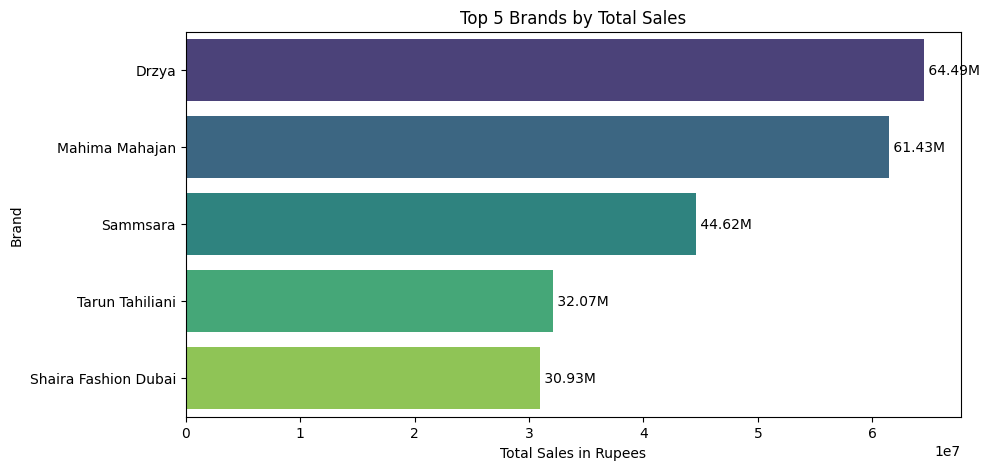

In [ ]:
top_brands = data.groupby('Brand')['Total Sales'].sum().sort_values(ascending=False).head(5)
print(top_brands/ 1e6)
print('above values are in Millions')
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title('Top 5 Brands by Total Sales')
plt.xlabel('Total Sales in Rupees')
for index, value in enumerate(top_brands.values):
    plt.text(value, index, f' {value/1e6:.2f}M', va='center')
plt.show()

In the above cell we have found the top 5 best selling brands according to total sales. Max sales are done by Drzya and minimum by Shaira Fashion Dubai

Sales Channel
BiteSpeed - Whatsapp Marketing        0.018232
Draft Orders                         98.596576
Magic Checkout - Tarun Tahiliani      4.336300
Online Store                        200.787834
WhatsApp Marketing & Broadcast        0.000000
Name: Total Sales, dtype: float64
above values are in Millions


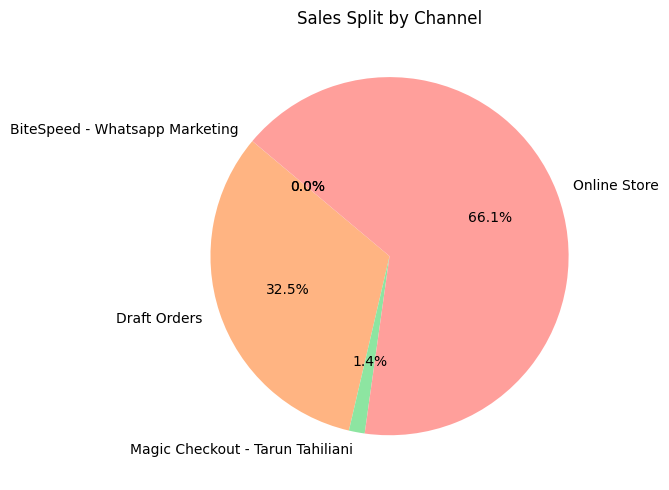

In [ ]:
sales_channels = data.groupby('Sales Channel')['Total Sales'].sum()
print (sales_channels/1e6)
print('above values are in Millions')
plt.figure(figsize=(7,5))
sales_channels.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Split by Channel')
plt.ylabel('')
plt.tight_layout()
plt.show()

In the above pie chart we can see that max sales are done via online stores telling that people prefer to make purchase through online store as compared to any other channel. Bitespeed marketting is not very effective as a channel for sales and whatsapp marketting and broadcast has had 0 sales.

Country
India                   160.856069
United States            68.363795
United Arab Emirates     17.997754
Saudi Arabia             15.401405
Canada                   10.220034
Name: Total Sales, dtype: float64
Above values are in Millions


<ipython-input-13-91f5608e1952>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


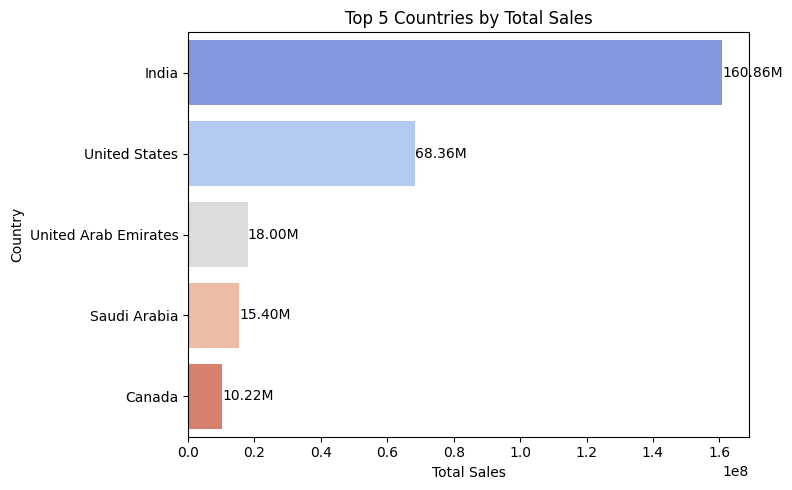

In [ ]:
top_countries = data.groupby('Country')['Total Sales'].sum().sort_values(ascending=False).head(5)
print(top_countries/1e6)
print("Above values are in Millions")
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title('Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
for index, value in enumerate(top_countries.values):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center')
plt.tight_layout()
plt.show()

From the above insight we can tell that the maximum sales come from India and least from Canada

In [ ]:
total_orders = data['Orders'].sum()
total_returns = data['Returns'].sum()
return_rate = (total_returns / total_orders) * 100
print(f'Return Rate: {return_rate:.2f}%')

Return Rate: 132645.85%


the return rate is very very high which is unexpected and shows some error in the dataset

In [ ]:
aov = total_sales / total_orders
print(aov)

23323.26970493734


The average order value comes to be around 23K

9111.0
3912.0


<ipython-input-16-f25ad8a1f91a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['New Customers', 'Returning Customers'], y=[new_orders, returning_orders], palette="Set2")


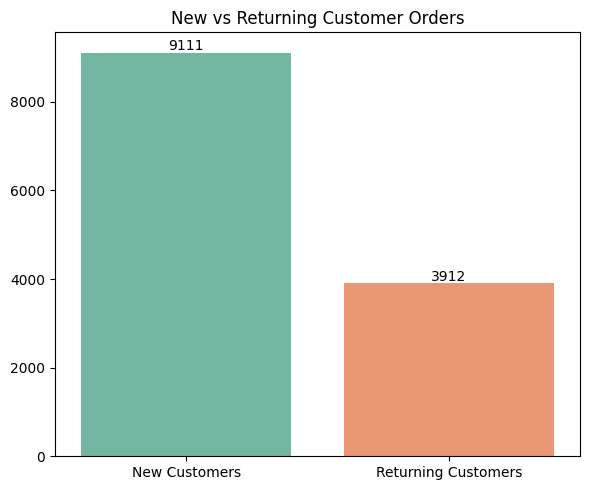

In [ ]:
new_orders = data['New Customer Orders'].sum()
print(new_orders)
returning_orders = data['Returning Customer Orders'].sum()
print(returning_orders)
plt.figure(figsize=(6,5))
sns.barplot(x=['New Customers', 'Returning Customers'], y=[new_orders, returning_orders], palette="Set2")
plt.title('New vs Returning Customer Orders')
for i, value in enumerate([new_orders, returning_orders]):
    plt.text(i, value + 50, str(int(value)), ha='center')
plt.tight_layout()
plt.show()

From the above data we can analyze that while the new customers are quite high the number od returning customers is not that much high.

In [ ]:
retention_rate = (returning_orders / new_orders) * 100
print(f'Retention Rate: {retention_rate:.2f}%')

Retention Rate: 42.94%


Customer retention rate comes to be around 43% which means we need to take feedbacks from customers and see that why they are not coming back much. There can be multiple reasons for this.

In [ ]:
top_cities = data.groupby('City')['Orders'].sum().sort_values(ascending=False).head(5)
print(top_cities)

City
Mumbai       1167
New Delhi     601
Delhi         483
Kolkata       455
Hyderabad     454
Name: Orders, dtype: int64


Most of the orders come from the metro cities of India where prople who know about these brands purchase. In the dataset we need to change city Delhi to New Delhi to get more accurate data

In [ ]:
data['City'] = data['City'].replace('Delhi', 'New Delhi')
top_cities = data.groupby('City')['Orders'].sum().sort_values(ascending=False).head(5)
print(top_cities)

City
Mumbai       1167
New Delhi    1084
Kolkata       455
Hyderabad     454
Unknown       437
Name: Orders, dtype: int64


<ipython-input-20-011fcd5e6086>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")


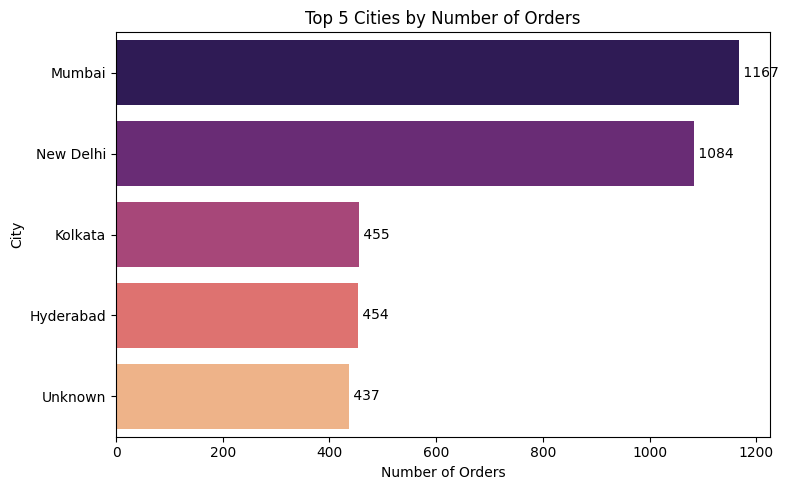

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")
plt.title('Top 5 Cities by Number of Orders')
plt.xlabel('Number of Orders')
for index, value in enumerate(top_cities.values):
    plt.text(value, index, f' {value}', va='center')
plt.tight_layout()
plt.show()

There is some missing data in the dataset. We need to find the cities which are missing in the data to know the 5th city

Product Type
Unknown         76.051815
Lehenga Set     45.945133
Anarkali Set    30.828674
Lehengas        13.696645
Kaftan          13.259103
Name: Total Sales, dtype: float64
Above data is in Millions


<ipython-input-21-583edc0dad51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_types.values, y=top_product_types.index, palette="flare")


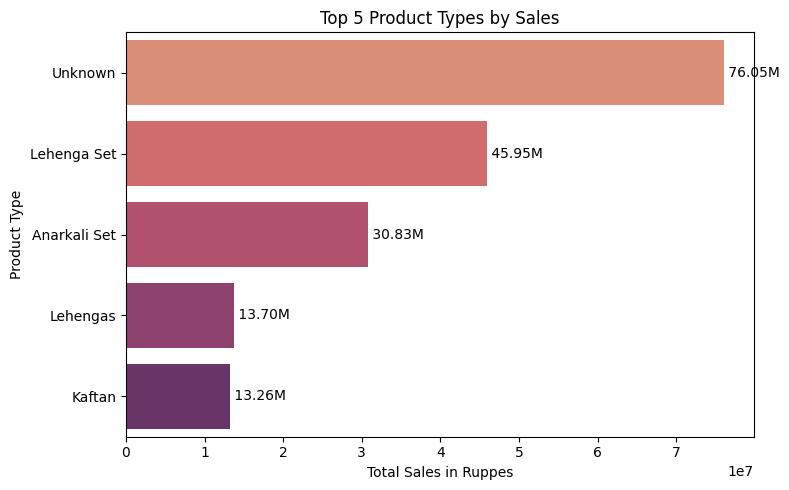

In [ ]:
top_product_types = data.groupby('Product Type')['Total Sales'].sum().sort_values(ascending=False).head(5)
print(top_product_types/1e6)
print("Above data is in Millions")
plt.figure(figsize=(8,5))
sns.barplot(x=top_product_types.values, y=top_product_types.index, palette="flare")
plt.title('Top 5 Product Types by Sales')
plt.xlabel('Total Sales in Ruppes')
for index, value in enumerate(top_product_types.values):
    plt.text(value, index, f' {value/1e6:.2f}M', va='center')
plt.tight_layout()
plt.show()

The most sold product is missing in this dataset which comes out to be known.

Date
2024-10-31    60.017611
2024-11-30    38.722974
2024-12-31    45.588104
2025-01-31    50.469328
2025-02-28    49.411889
2025-03-31    59.529037
Freq: ME, Name: Total Sales, dtype: float64


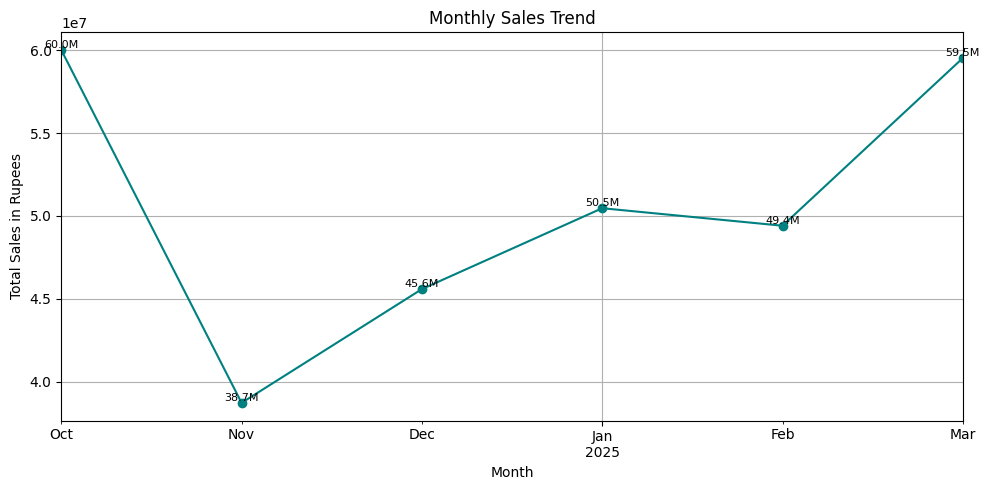

In [ ]:
# Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors='coerce')
data = data.dropna(subset=['Total Sales'])
data = data.sort_values(by='Date')

# Monthly aggregation
monthly_sales = data.set_index('Date').resample('ME')['Total Sales'].sum()
print(monthly_sales / 1e6)

# Plotting
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales in Rupees')
plt.xlabel('Month')

for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, f'{y/1e6:.1f}M', ha='center', va='bottom', fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


The above graph tells us that maximum sales is done in the month October followed by March then Jan which is marginally higher than February followed by December and November

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nbconvert to determine which version is compatible with other requirem